In [1]:

# Set up notebook
%pprint
%matplotlib inline
import sys
import os.path as osp, os as os

executable_path = sys.executable
scripts_folder = osp.join(osp.dirname(executable_path), 'Scripts'); assert osp.exists(scripts_folder)
py_folder = osp.abspath(osp.join(os.pardir, 'py')); assert osp.exists(py_folder), "Create the py folder"
shared_folder = osp.abspath(osp.join(os.pardir, 'share')); assert osp.exists(shared_folder), "You are missing the share folder"

if (scripts_folder not in sys.path): sys.path.insert(1, scripts_folder)
if (py_folder not in sys.path): sys.path.insert(1, py_folder)
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)

from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join(os.pardir, 'data')),
    saves_folder_path=osp.abspath(osp.join(os.pardir, 'saves'))
)

Pretty printing has been turned OFF


In [2]:

# Get a hand-valued dictionary of font sizes for each country
fontsize_dict = {
    'Iran': 140,
    'Turkey': 82,
    'Iraq': 76,
    'Egypt': 60,
    'Yemen': 50,
    'Saudi Arabia': 46,
    'Oman': 36,
    'Syria': 36,
    'Jordan': 18,
    'Israel': 8,
    'Kuwait': 8,
    'United Arab Emirates': 6,
    'Lebanon': 5,
    'Qatar': 4,
    'Bahrain': 1,
}

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.87s/it]


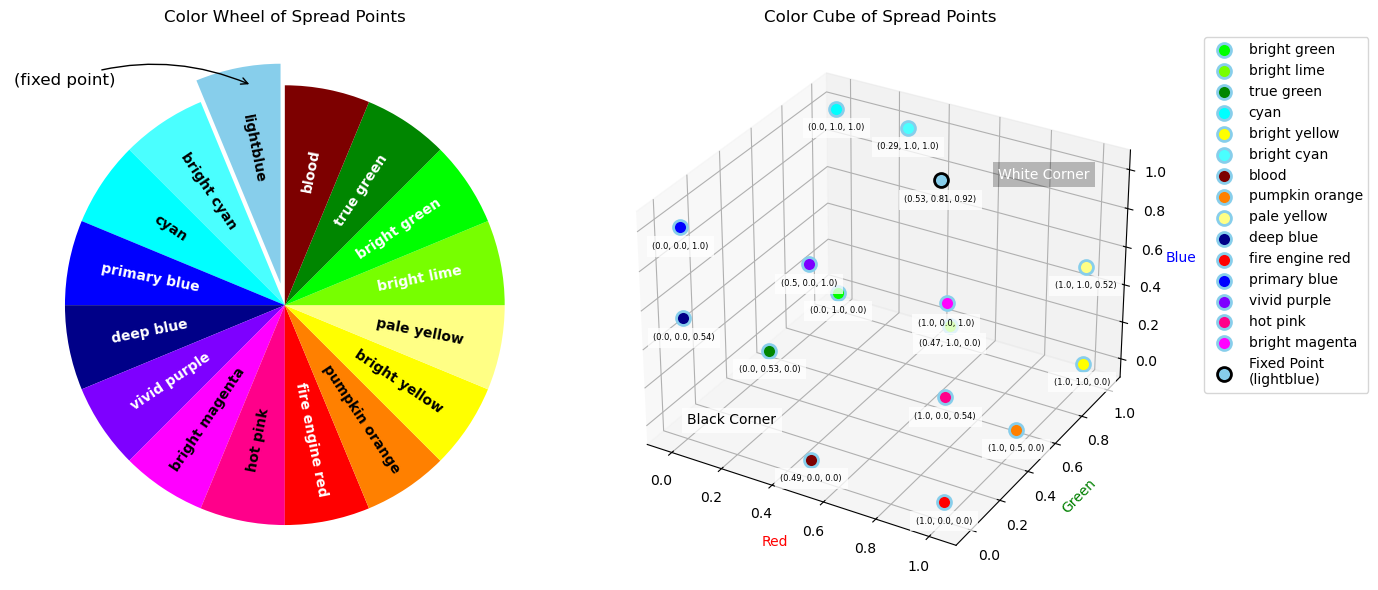

In [3]:

from tqdm import tqdm

# Get a fixed point in the normalized RGB color space
ranges = [(0, 1), (0, 1), (0, 1)]
fixed_point = (0.5294117647058824, 0.807843137254902, 0.9215686274509803)  # The ocean color

# Get additional points to spread
point_count = len(fontsize_dict)

# Initialize a list to store trial results
trials = []
total_trials = 5  # You can adjust this based on your patience
    
# Perform trials to find the best spread of points
with tqdm(total=total_trials) as pbar:
    while len(trials) < total_trials:
        
        # Attempt to spread the points evenly within a unit cube
        try:
            spread_points = nu.spread_points_in_cube(
                point_count, fixed_point, *ranges, verbose=False
            )
    
            # Ensure spread points have all unique XKCD names
            xkcd_set = set()
            for rgb_color in spread_points:
                nearest_neighbor = nu.get_nearest_neighbor(rgb_color, nu.xkcd_colors)
                xkcd_set.add(nu.nearest_xkcd_name_dict[nearest_neighbor])
            if len(xkcd_set) == len(spread_points):
                
                # Measure how far the points are from the fixed point
                spread_value = nu.calculate_spread(spread_points[1:], fixed_point, verbose=False)
                
                # Store the result as a tuple of (spread_points, spread_value)
                trial_tuple = (spread_points, spread_value)
                trials.append(trial_tuple)  # Add a new trial
                
                # Update the progress bar
                pbar.update(1)  # Increment the progress bar by 1
        
        # If an error occurs (e.g., a spread point too close to black or white), skip this trial
        except Exception:
            continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

# Extract the spread points from the best trial
spread_points = trial_tuple[0]

# Notice the colors are well-spaced in the 3D scatter plot but not in the pie chart
nu.inspect_spread_points(spread_points, verbose=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:28<00:00,  5.72s/it]


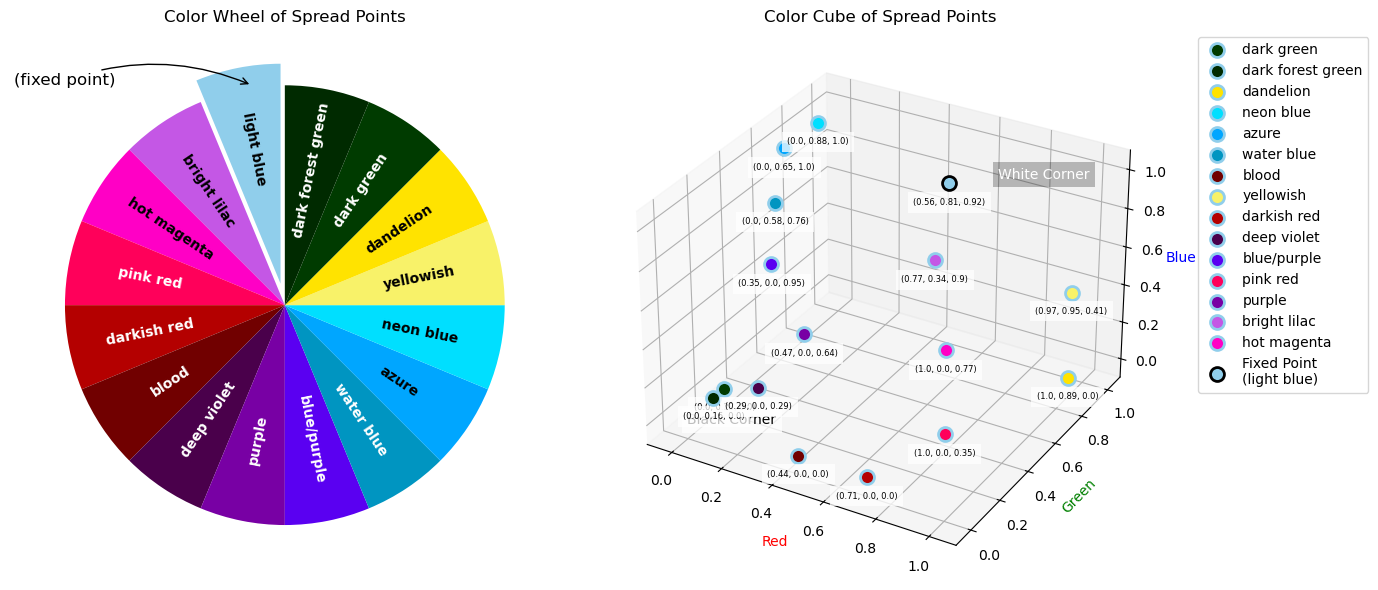

In [4]:

from tqdm import tqdm
from colormath.color_objects import LabColor

# Get a fixed point in the CIELAB color space
ranges = [(0, 100), (-128, 127), (-128, 127)]
ocean_color = (0.5294117647058824, 0.807843137254902, 0.9215686274509803)  # light blue
fixed_point = nu.rgb_to_lab(ocean_color).get_value_tuple()

# Get additional points to spread
point_count = len(fontsize_dict)

# Initialize a list to store trial results
trials = []
total_trials = 5  # You can adjust this based on your patience

# Perform trials to find the best spread of points
with tqdm(total=total_trials) as pbar:
    while len(trials) < total_trials:
        
        # Attempt to spread the points evenly within a unit cube
        try:
            spread_points = nu.spread_points_in_cube(
                point_count, fixed_point, *ranges, verbose=False
            )

            # Ensure spread points have all unique XKCD names
            xkcd_set = set()
            for lab_color in spread_points:
                rgb_color = nu.lab_to_rgb(LabColor(*lab_color))
                nearest_neighbor = nu.get_nearest_neighbor(rgb_color, nu.xkcd_colors)
                xkcd_set.add(nu.nearest_xkcd_name_dict[nearest_neighbor])
            if len(xkcd_set) == len(spread_points):
                
                # Measure how far the points are from the fixed point
                spread_value = nu.calculate_spread(spread_points[1:], fixed_point, verbose=False)
                
                # Store the result as a tuple of (spread_points, spread_value)
                trial_tuple = (spread_points, spread_value)
                trials.append(trial_tuple)  # Add a new trial
                
                # Update the progress bar
                pbar.update(1)  # Increment the progress bar by 1
        
        # If an error occurs (e.g., a spread point too close to black or white), skip this trial
        except Exception:
            continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

# Extract the spread points from the best trial
spread_points = [nu.lab_to_rgb(LabColor(*lab_color)) for lab_color in trial_tuple[0]]

# Notice the colors are well-spaced in the pie chart but not in the 3D scatter plot
nu.inspect_spread_points(spread_points, verbose=False)


Notice, above, that the colors are well-spaced in the 3D scatterplot but not on the pie chart.


Notice, above, that the colors are well-spaced on the pie chart but not in the 3D scatterplot.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.01s/it]


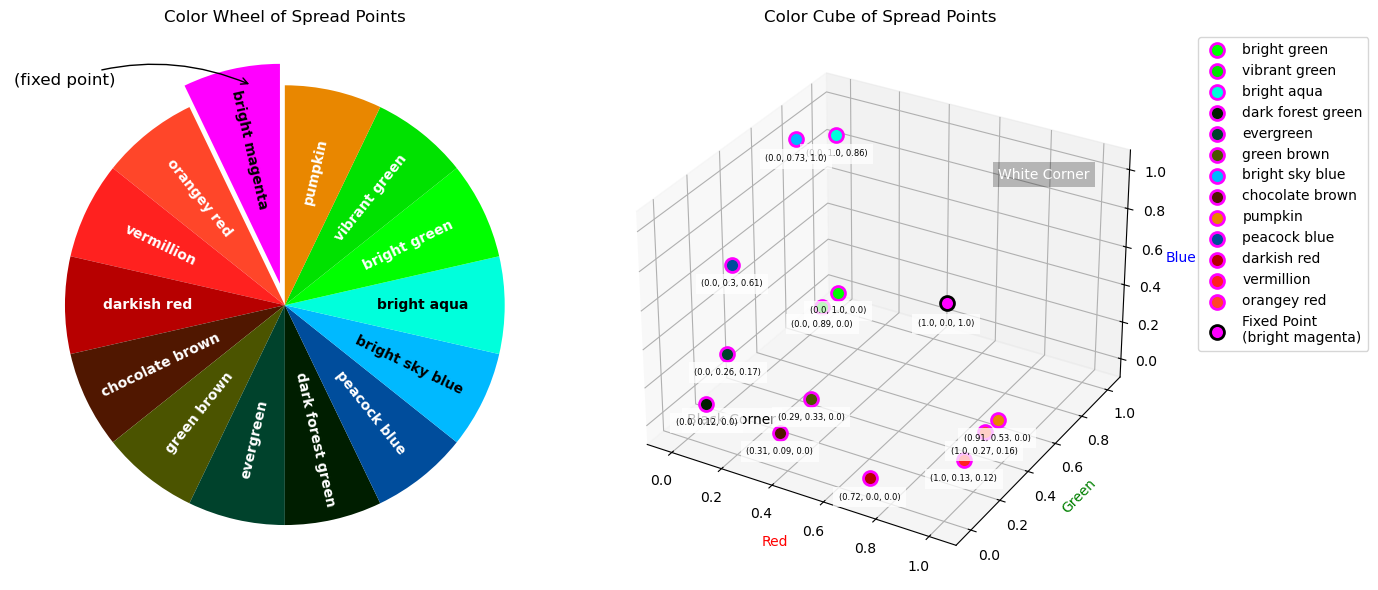

In [8]:

import random
from tqdm import tqdm
from colormath.color_objects import LabColor

# Generate a random fixed point in the CIELAB color space
ranges = [(0, 100), (-128, 127), (-128, 127)]
lab_fixed_point = tuple([random.uniform(a, b) for a, b in ranges])

# Generate a random number of additional points to spread, between 1 and 15
point_count = random.randint(1, 15)

# Initialize a list to store trial results
trials = []
total_trials = 5  # You can adjust this based on your patience

# Perform trials to find the best spread of points
with tqdm(total=total_trials) as pbar:
    while len(trials) < total_trials:
        
        # Attempt to spread the points evenly within a unit cube
        try:
            spread_points = nu.spread_points_in_cube(
                point_count, lab_fixed_point, *ranges, verbose=False
            )

            # Ensure spread points have all unique XKCD names
            xkcd_set = set()
            for lab_color in spread_points:
                rgb_color = nu.lab_to_rgb(LabColor(*lab_color))
                nearest_neighbor = nu.get_nearest_neighbor(rgb_color, nu.xkcd_colors)
                xkcd_set.add(nu.nearest_xkcd_name_dict[nearest_neighbor])
            if len(xkcd_set) == len(spread_points):
                
                # Measure how far the points are from the fixed point
                spread_value = nu.calculate_spread(spread_points[1:], lab_fixed_point, verbose=False)
                
                # Store the result as a tuple of (spread_points, spread_value)
                trial_tuple = (spread_points, spread_value)
                trials.append(trial_tuple)  # Add a new trial
                
                # Update the progress bar
                pbar.update(1)  # Increment the progress bar by 1
        
        # If an error occurs (e.g., a spread point too close to black or white), skip this trial
        except Exception:
            continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

# Extract the spread points from the best trial
spread_points = [nu.lab_to_rgb(LabColor(*lab_color)) for lab_color in trial_tuple[0]]

# Notice the colors are well-spaced in the pie chart but not in the 3D scatter plot
nu.inspect_spread_points(spread_points, verbose=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.20s/it]


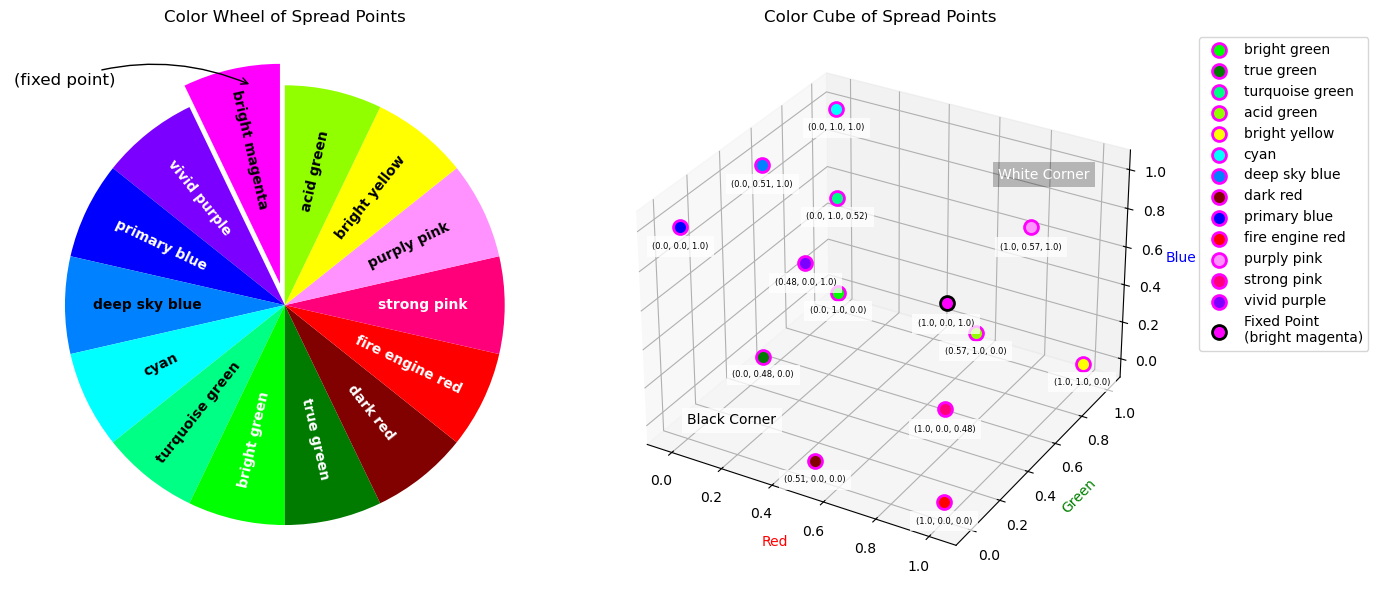

In [9]:

import random
from tqdm import tqdm
from colormath.color_objects import LabColor

# Covert fixed point in CIELAB color space to normalized RGB color space
ranges = [(0, 1), (0, 1), (0, 1)]
rgb_fixed_point = nu.lab_to_rgb(LabColor(*lab_fixed_point)) 

# Initialize a list to store trial results
trials = []
total_trials = 5  # You can adjust this based on your patience

# Perform trials to find the best spread of points
with tqdm(total=total_trials) as pbar:
    while len(trials) < total_trials:
        
        # Attempt to spread the points evenly within a unit cube
        try:
            spread_points = nu.spread_points_in_cube(
                point_count, rgb_fixed_point, *ranges, verbose=False
            )

            # Ensure spread points have all unique XKCD names
            xkcd_set = set()
            for rgb_color in spread_points:
                nearest_neighbor = nu.get_nearest_neighbor(rgb_color, nu.xkcd_colors)
                xkcd_set.add(nu.nearest_xkcd_name_dict[nearest_neighbor])
            if len(xkcd_set) == len(spread_points):
                
                # Measure how far the points are from the fixed point
                spread_value = nu.calculate_spread(spread_points[1:], rgb_fixed_point, verbose=False)
                
                # Store the result as a tuple of (spread_points, spread_value)
                trial_tuple = (spread_points, spread_value)
                trials.append(trial_tuple)  # Add a new trial
                
                # Update the progress bar
                pbar.update(1)  # Increment the progress bar by 1
        
        # If an error occurs (e.g., a spread point too close to black or white), skip this trial
        except Exception:
            continue

# Select the trial with points as far away from the fixed point as possible
trial_tuple = max(trials, key=lambda x: x[1])

# Extract the spread points from the best trial
spread_points = trial_tuple[0]

# Notice the colors are well-spaced in the 3D scatter plot but not in the pie chart
nu.inspect_spread_points(spread_points, verbose=False)


----

In [2]:

import colorsys

# Test the transformation
ocean_color = (0.5294117647058824, 0.807843137254902, 0.9215686274509803)  # The ocean color
tolerance = 1e-3

# Convert RGB to CIELAB
LabColor_obj = nu.rgb_to_lab(ocean_color)

# Convert CIELAB back to RGB
rgb_color = nu.lab_to_rgb(LabColor_obj)

# Assert that the resulting RGB values are approximately equal to the original
assert all(abs(rc - oc) < tolerance for rc, oc in zip(rgb_color, ocean_color)), (
    f"RGB values {rgb_color} do not match original {ocean_color} within tolerance"
)

In [6]:

ocean_color = (0.5294117647058824, 0.807843137254902, 0.9215686274509803)  # light blue
nu.rgb_to_lab(ocean_color).get_value_tuple()

(79.2075787642408, -14.836549579985036, -21.283982499973362)

In [13]:

# Looking for (0.5294117647058824, 0.807843137254902, 0.9215686274509803)
colorsys.hls_to_rgb(h=79.2075787642408, l=-14.836549579985036, s=-21.283982499973362)

(145.9132229685606, 300.9443120404036, -330.6174112003737)

In [14]:

# Looking for (0.5294117647058824, 0.807843137254902, 0.9215686274509803)
colorsys.hsv_to_rgb(h=79.2075787642408, s=-14.836549579985036, v=-21.283982499973362)

(-98.79952703590376, -21.283982499973362, -337.064844120362)

In [15]:

# Looking for (0.5294117647058824, 0.807843137254902, 0.9215686274509803)
colorsys.yiq_to_rgb(y=79.2075787642408, i=-14.836549579985036, q=-21.283982499973362)

(1.0, 1.0, 1.0)

In [16]:

# Looking for (79.2075787642408, -14.836549579985036, -21.283982499973362)
colorsys.rgb_to_hls(r=0.5294117647058824, g=0.807843137254902, b=0.9215686274509803)

(0.5483333333333333, 0.7254901960784313, 0.714285714285714)

In [17]:

# Looking for (79.2075787642408, -14.836549579985036, -21.283982499973362)
colorsys.rgb_to_hsv(r=0.5294117647058824, g=0.807843137254902, b=0.9215686274509803)

(0.5483333333333333, 0.42553191489361697, 0.9215686274509803)

In [18]:

# Looking for (79.2075787642408, -14.836549579985036, -21.283982499973362)
colorsys.rgb_to_yiq(r=0.5294117647058824, g=0.807843137254902, b=0.9215686274509803)

(0.7368235294117647, -0.20336588235294112, -0.02381215686274507)